<table width='100%'>
<tr>
<td style='background-color:white'>
    <p align="left">
    Exercises for the course<br>
        <b>Machine Learning for Data Science</b><br>
    Winter Semester 2024/25
    </p>
</td>
<td style='background-color:white'>
    G. Montavon<br>
    Institute of Computer Science<br>
    <b>Department of Mathematics and Computer Science</b><br>
    Freie Universität Berlin
</td>
</tr>
</table>

<br>
<center>
    <h1>Exercise Sheet 1</h1>
</center>
<br>

In the following, we explore different ways of accessing data, including reading CSV files, querying databases, and applying preprocessing and plotting techniques to the available data. The cell below imports some libraries that are required to complete the tasks. Note that you need to install additional python libraries such as `cv2`, `torch`, `torchvision`, `matolotlib` and `sqlite3`. Some of these libraries will also be needed for the next exercise sheets.

In [3]:
%matplotlib inline
import numpy,scipy,scipy.spatial
import torch
import torchvision,torchvision.transforms
import sqlite3
import matplotlib
from matplotlib import pyplot as plt
from PIL import Image

## Exercise 1: Loading CSV Data (15+15 P)

In this exercise, we investigate the usage of the function `numpy.genfromtxt` to load several datasets from the UCI repository. These datasets are provided in the form of csv files in the folder `csvdata` of the homework.



**(a)** Using the method `numpy.genfromtxt`, load the dataset contained in the file `Wholesale customers data.csv`. In this dataset, instances (rows) are retailers, and features (columns) represent how much these retailers spend for different categories of products. Once the dataset is loaded, compute the average and median spending (over instances) for each category of products.

In [13]:
wholesale_data = numpy.genfromtxt('csvdata/Wholesale customers data.csv', delimiter=',', skip_header=1)

arithmetic_mean = numpy.mean(wholesale_data, axis=0)
median = numpy.median(wholesale_data, axis=0)

print(wholesale_data.shape)
print(arithmetic_mean)
print(median)

(440, 8)
[1.32272727e+00 2.54318182e+00 1.20002977e+04 5.79626591e+03
 7.95127727e+03 3.07193182e+03 2.88149318e+03 1.52487045e+03]
[1.0000e+00 3.0000e+00 8.5040e+03 3.6270e+03 4.7555e+03 1.5260e+03
 8.1650e+02 9.6550e+02]


**(b)** Using the method `numpy.genfromtxt`, load the dataset contained in the file `CortexNuclear.csv`, and use the library `matplotlib` to produce an image plot that visualizes the dataset, specifically visualize the first 30 instances that do not contain any missing value.

[[3.09100000e+03 5.03643884e-01 7.47193224e-01 ...            nan
             nan            nan]
 [3.09200000e+03 5.14617080e-01 6.89063548e-01 ...            nan
             nan            nan]
 [3.09300000e+03 5.09183088e-01 7.30246795e-01 ...            nan
             nan            nan]
 ...
 [3.11130000e+04 4.88372093e-01 5.40085679e-01 ...            nan
             nan            nan]
 [3.11140000e+04 5.14854614e-01 5.64791403e-01 ...            nan
             nan            nan]
 [3.11150000e+04 4.85099846e-01 5.56374808e-01 ...            nan
             nan            nan]]
(30, 82)
(1080, 82)


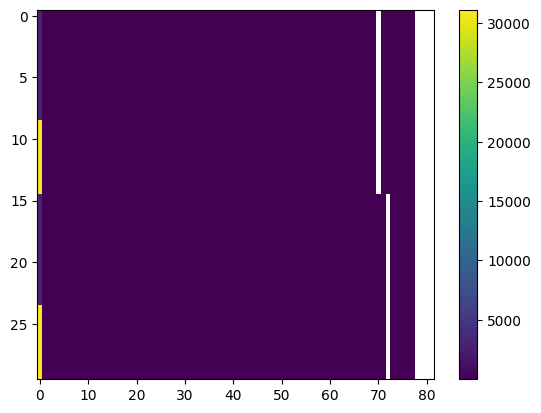

In [31]:
cortex_data = numpy.genfromtxt('csvdata/cortexNuclear.csv', delimiter=',', skip_header=1, encoding=None, dtype=None)
first_30 = cortex_data[:30]
print(first_30)

print(first_30.shape)

fig, ax = plt.subplots()
graph = ax.imshow(first_30, cmap='viridis', aspect='auto')

plt.colorbar(graph)
print(cortex_data.shape)

## Exercise 2: Querying a Database (20+20 P)

In the following, we will use the sqlite3 package to connect to a database, and perform various join operations. The sqlite3 package enables you to connect to a database and to perform various queries. We will consider the chinook database, which simulates data from a music store, relating music tracks, artists, invoices, customers, etc. Connect to the database. The database can also be downloaded from the link https://www.sqlitetutorial.net/sqlite-sample-database/ .

In [ ]:
db = sqlite3.connect('chinook.db')

The database has the following schema

![](sqlite-sample-database-color.jpg)

We first consider a simple query on this database. The query is formulated in the SQL language and retrieves the duration of tracks found in that database. Once the results of the query have been obtained, we perform a very basic data analysis: computing the mean track duration.

In [ ]:
cursor = db.cursor()
query = "SELECT Milliseconds FROM tracks;"
results = numpy.array(cursor.execute(query).fetchall())
mean = results.mean()/1000.0
print(f"{'Average track duration':25s} {mean:8.3f}")

Now, we would like to perform more complex SQL queries. For a tutorial on SQL, see for example, https://www.sqltutorial.org/. In particular, look at Section 6 which discusses the SQL operation "INNER JOIN" and that is useful for generating outputs involving multiple tables.

**(a)** Apply a SQL query that extracts a table containing for all tracks their genre and their track length. Then, write code that computes for each genre (sorted alphabetically the average track length).

In [ ]:
# ------------------------------------
# TODO: Replace by your code
# ------------------------------------
import solutions
solutions.task2a(db)
# ------------------------------------

We would like to analyze the preference for music genres in different countries.

**(b)** Apply a SQL query that extracts for each invoice the country of the customer and the genre of the track the customer has purchased. Then, print in the form of a table the number of purchases for each country and genre.

In [ ]:
# ------------------------------------
# TODO: Replace by your code
# ------------------------------------
import solutions
solutions.task2b(db)
# ------------------------------------

## Exercise 3: Representing Images (15+15 P)

Images are high-dimensional data. High-level concepts contained in these images are hard to extract directly from the raw pixel representation. In the following, we investigate the benefit of preprocessing the data with a neural network. Specifically, we want to see if representations built by the neural network enable to produce meaningful similarities or dissimilarities between images. We consider for this exercise a set ot 10 images. The first 5 images depict geraniums, and the last 5 images depict ferrari cars.

In [ ]:
images = [Image.open(f'imagedata/{i}.jpg') for i in range(10)]

Although the two groups are clearly distinct from a human point of view, we will show that distances computed on pixel values (i.e. treating an image as vector storing the multiple RGB pixel values) does do not enable such distinction.

**(a)** Compute a matrix of pairwise Euclidean distances between images (images are resized to 100 x 100 for this task).

In [ ]:
resizedimages = [numpy.array(img.resize((100,100))).flatten() for img in images]

# ------------------------------------
# TODO: Replace by your code
# ------------------------------------
import solutions
D = solutions.task3a(resizedimages)
# ------------------------------------

The distance matrix can then be displayed using `matplotlib`.

In [ ]:
plt.imshow(D)
plt.colorbar()

We cannot see clear similarities (low distances) within each image group. This suggests that the pixel representation does not encode well the concepts we are interested in.

To address this limitation, we consider a state-of-the-art neural network called `densenet161` and available pretrained in the `torchvision` libary. This neural network is composed of a feature extractor and a classification head. The feature extractor transforms image data (given as a `torch` tensor) into a tensor of activations where concepts are easier to predict.

**(b)** Compute the distance matrix between the images represented at the output of the densenet features extractor.

*Hints: (1) The input images need to be converted to a torch tensor and the normalized using the function provided below before being fed to the neural network. (2) Note that the tensor at the output of the network can vary in shape due to the varying size of the input images. This can be addressed by applying the mean operation over the two dimensions representing the horizontal and vertical components.*

In [ ]:
model = torchvision.models.densenet161(pretrained=True).features
model.eval();

def normalize(x):
    x = x - torch.Tensor([0.485, 0.456, 0.406]).reshape(1,-1,1,1)
    x = x / torch.Tensor([0.229, 0.224, 0.225]).reshape(1,-1,1,1)
    return x

# ------------------------------------
# TODO: Replace by your code
# ------------------------------------
import solutions
D = solutions.task3b(images,model,normalize)
# ------------------------------------

plt.imshow(D)
plt.colorbar()

We observe that distances now form a block structure, where the first 5 images are clearly mutually similar, and similarly for the last 5 images.